# Análisis y visualización estadística de datos para facilitar la enseñanza de parámetros hidrogeológicos en clase: Integrando tecnología y pedagogía con AquiParameter

Autores: José Antonio Hernández Espriú, Saúl Arciniega Esparza, Héctor Baez-Reyes

Grupo de Hidrogeología, Facultad de Ingeniería, Universidad Nacional Autónoma de México, Ciudad de México, C.P. 04510, México.


## Introducción

Esta notebook presenta un ejemplo de visualización de cuatro variables de la base de datos de parámetros de hidráulicos de la plataforma [AquiPameter](https://aquiparameter.ingenieria.unam.mx/).


El primer paso a realizar es la importación de las librerías para la lectura y visualización de los datos, que para este caso se utilizan tres librerías: [Pandas](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/), [Seaborn](https://seaborn.pydata.org/).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Ahora leemos nuestro archivo de la base de datos de AquiParameters.
Para ello usaremos un archivo de la base de datos almacenada en un repositorio, y utilizaremos la librería de Pandas para la lectura del archivo.

In [2]:
# Indicamos la dirección de nuestro archivo, la siguiente ruta mejor no modificarla para este ejemplo
f = r"https://filedn.com/l31Uxc2iCI1koQr1EKWjwQH/Research/aquiparameter/database.csv"
# Cargamos los datos a Python con la librería Pandas
df = pd.read_csv(f, na_values="NA")  # indicamos que el texto NA lo interprete como datos faltantes con na_values="NA"

Finalmente, indicamos las cuatro columnas que utilizaremos para asignar en el eje x (**xvar**), eje y (**yvar**), tamaño de los elementos (**svar**), y para indicar una categoría (**category**).

Para estas columnas podemos seleccionar:
- "Type": tipo de reoca
- "Lithology": litología
- "Tporosity": porosidad total en porcentaje
- "Eporosity": porosidad eficaz en porcentaje
- "K": conductividad hidráulica en metros por día
- "S": coeficiente de almacenamiento (adimensional)
- "Sy": rendimiento específico (adimensional)
- "Compressibility": compresibilidad de la roca en m$^{2}$/N

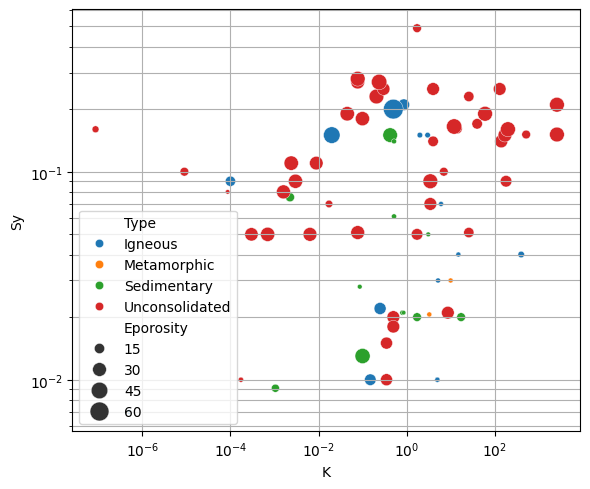

In [3]:
# Indicamos las cuatro variables que vamos a graficas
# El usuario puede modificar estas variables para analizar otras relaciones
xvar = "K"
yvar = "Sy"
svar = "Eporosity"
category = "Type"


# Obtenemos esas variables de nuestra base de datos y eliminamos renglones sin datos
data = df[[xvar, yvar, svar, category]].dropna()
# Creamos una figura y eje con escala logarítmica
fig, ax = plt.subplots(figsize=(6, 5))  # figura de 6x5 pulgadas
ax.set(xscale="log", yscale="log")  # asignamos escala loglog
ax.grid(True, which="both")            # habilitamos la malla
# Graficamos nuestros datos y asignamos algunas propiedades de visualización
sns.scatterplot(data=data, x=xvar, y=yvar, size=svar, hue=category, sizes=(10, 200), ax=ax)
# Visualizamos nuestra gráfica
fig.tight_layout()
fig.show()